##### Copyright 2021 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Transfer Learning for the Audio Domain with TensorFlow Lite Model Maker

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/lite/models/modify/model_maker/audio_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/models/modify/model_maker/audio_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/models/modify/model_maker/audio_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/tensorflow/tensorflow/lite/g3doc/models/modify/model_maker/audio_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/google/yamnet/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>

</table>


In this colab notebook, you'll learn how to use the [TensorFlow Lite Model Maker](https://www.tensorflow.org/lite/models/modify/model_maker) to train a custom audio classification model.

The Model Maker library uses transfer learning to simplify the process of training a TensorFlow Lite model using a custom dataset. Retraining a TensorFlow Lite model with your own custom dataset reduces the amount of training data and time required.

It is part of the [Codelab to Customize an Audio model and deploy on Android](https://codelabs.developers.google.com/codelabs/tflite-audio-classification-custom-model-android).

You'll use a custom birds dataset and export a TFLite model that can be used on a phone, a TensorFlow.JS model that can be used for inference in the browser and also a SavedModel version that you can use for serving.


## Intalling dependencies


In [2]:
!sudo apt -y install libportaudio2
!pip install tflite-model-maker



libportaudio2 is already the newest version (19.6.0-1build1).


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0
Use 'sudo apt autoremove' to remove them.


0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.


  Using cached tflite_model_maker-0.4.2-py3-none-any.whl (577 kB)


  Using cached matplotlib-3.4.3-cp39-cp39-manylinux1_x86_64.whl (10.3 MB)


  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)


  Using cached tensorflow_addons-0.18.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)


  Using cached PyYAML-6.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (661 kB)


  Using cached tensorflow_model_optimization-0.7.3-py2.py3-none-any.whl (238 kB)


  Using cached lxml-4.9.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (7.0 MB)


  Using cached neural_structured_learning-1.4.0-py2.py3-none-any.whl (128 kB)


  Using cached Cython-0.29.32-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (2.0 MB)


  Using cached scann-1.2.6-cp39-cp39-manylinux2014_x86_64.whl (10.9 MB)


  Using cached numba-0.53.0-cp39-cp39-manylinux2014_x86_64.whl (3.4 MB)


  Using cached tensorflowjs-3.18.0-py3-none-any.whl (77 kB)


  Using cached tf_models_official-2.3.0-py2.py3-none-any.whl (840 kB)


  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)


  Using cached tflite_support-0.4.2-cp39-cp39-manylinux2014_x86_64.whl (60.1 MB)


  Using cached fire-0.4.0-py2.py3-none-any.whl


  Using cached sentencepiece-0.1.97-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)


  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
  Using cached audioread-3.0.0-py3-none-any.whl


  Using cached soundfile-0.11.0-py2.py3-none-any.whl (23 kB)


  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)


  Using cached llvmlite-0.36.0-cp39-cp39-manylinux2010_x86_64.whl (25.3 MB)


  Using cached tensorflow-2.8.3-cp39-cp39-manylinux2010_x86_64.whl (498.5 MB)


  Using cached google_api_python_client-2.65.0-py2.py3-none-any.whl (10.4 MB)


  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)


  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
  Using cached py_cpuinfo-8.0.0-py3-none-any.whl


  Using cached opencv_python_headless-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (48.3 MB)


  Using cached kaggle-1.5.12-py3-none-any.whl


  Using cached google_cloud_bigquery-3.3.5-py2.py3-none-any.whl (211 kB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)


  Using cached tensorflow_estimator-2.8.0-py2.py3-none-any.whl (462 kB)


  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)


  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)


  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)


  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)


  Using cached dm_tree-0.1.7-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (142 kB)


  Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)


  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)


  Using cached sounddevice-0.4.5-py3-none-any.whl (31 kB)


  Using cached google_api_core-2.10.2-py3-none-any.whl (115 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)


  Using cached google_auth_httplib2-0.1.0-py2.py3-none-any.whl (9.3 kB)
  Using cached httplib2-0.20.4-py3-none-any.whl (96 kB)


  Using cached proto_plus-1.22.1-py3-none-any.whl (47 kB)


  Using cached pyarrow-9.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35.3 MB)


  Using cached google_resumable_media-2.4.0-py2.py3-none-any.whl (77 kB)


  Using cached google_cloud_bigquery_storage-2.16.2-py2.py3-none-any.whl (185 kB)
  Using cached google_cloud_core-2.3.2-py2.py3-none-any.whl (29 kB)


  Using cached python_slugify-6.1.2-py2.py3-none-any.whl (9.4 kB)


  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)


  Using cached grpcio_status-1.50.0-py3-none-any.whl (14 kB)


  Using cached google_crc32c-1.5.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (32 kB)


  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


  Using cached grpcio_status-1.49.1-py3-none-any.whl (14 kB)


  Using cached grpcio_status-1.48.2-py3-none-any.whl (14 kB)


  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0rc0


    Uninstalling tensorflow-estimator-2.11.0rc0:
      Successfully uninstalled tensorflow-estimator-2.11.0rc0


  Attempting uninstall: keras
    Found existing installation: keras 2.11.0rc1


    Uninstalling keras-2.11.0rc1:
      Successfully uninstalled keras-2.11.0rc1


  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12


  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0


    Uninstalling matplotlib-3.6.0:


      Successfully uninstalled matplotlib-3.6.0


  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1


    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1


  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0rc1


    Uninstalling tensorflow-2.11.0rc1:


      Successfully uninstalled tensorflow-2.11.0rc1


## Import TensorFlow, Model Maker and other libraries

Among the dependencies that are needed, you'll use TensorFlow and Model Maker. Aside those, the others are for audio manipulation, playing and visualizations.

In [3]:
import tensorflow as tf
import tflite_model_maker as mm
from tflite_model_maker import audio_classifier
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import glob
import random

from IPython.display import Audio, Image
from scipy.io import wavfile

print(f"TensorFlow Version: {tf.__version__}")
print(f"Model Maker Version: {mm.__version__}")

TensorFlow Version: 2.8.3
Model Maker Version: 0.4.2


## The Birds dataset

The Birds dataset is an education collection of 5 types of birds songs:

- White-breasted Wood-Wren
- House Sparrow
- Red Crossbill
- Chestnut-crowned Antpitta
- Azara's Spinetail

The original audio came from [Xeno-canto](https://www.xeno-canto.org/) which is a website dedicated to sharing bird sounds from all over the world.

Let's start by downloading the data.

In [4]:
birds_dataset_folder = tf.keras.utils.get_file('birds_dataset.zip',
                                                'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/birds_dataset.zip',
                                                cache_dir='./',
                                                cache_subdir='dataset',
                                                extract=True)
                                                

    16384/343680986 [..............................] - ETA: 1s

  4202496/343680986 [..............................] - ETA: 12s

 12591104/343680986 [>.............................] - ETA: 5s 

 25174016/343680986 [=>............................] - ETA: 4s

 33562624/343680986 [=>............................] - ETA: 3s

 39854080/343680986 [==>...........................] - ETA: 3s

 48242688/343680986 [===>..........................] - ETA: 3s

 57171968/343680986 [===>..........................] - ETA: 2s

 58728448/343680986 [====>.........................] - ETA: 2s

 71368704/343680986 [=====>........................] - ETA: 2s

 77602816/343680986 [=====>........................] - ETA: 2s

 83894272/343680986 [======>.......................] - ETA: 2s

 95846400/343680986 [=======>......................] - ETA: 2s

104865792/343680986 [========>.....................] - ETA: 2s

109060096/343680986 [========>.....................] - ETA: 2s

117448704/343680986 [=========>....................] - ETA: 1s

125837312/343680986 [=========>....................] - ETA: 1s

136347648/343680986 [==========>...................] - ETA: 1s

147357696/343680986 [===========>..................] - ETA: 1s

155197440/343680986 [============>.................] - ETA: 1s

161570816/343680986 [=============>................] - ETA: 1s

170852352/343680986 [=============>................] - ETA: 1s

182116352/343680986 [==============>...............] - ETA: 1s

186761216/343680986 [===============>..............] - ETA: 1s

195043328/343680986 [================>.............] - ETA: 1s

203456512/343680986 [================>.............] - ETA: 1s

211820544/343680986 [=================>............] - ETA: 1s

218128384/343680986 [==================>...........] - ETA: 0s

224657408/343680986 [==================>...........] - ETA: 0s

229294080/343680986 [===================>..........] - ETA: 0s

234676224/343680986 [===================>..........] - ETA: 0s

244383744/343680986 [====================>.........] - ETA: 0s

251666432/343680986 [====================>.........] - ETA: 0s

258629632/343680986 [=====================>........] - ETA: 0s

261652480/343680986 [=====================>........] - ETA: 0s

272089088/343680986 [======================>.......] - ETA: 0s

283959296/343680986 [=======================>......] - ETA: 0s

291512320/343680986 [========================>.....] - ETA: 0s

299753472/343680986 [=========================>....] - ETA: 0s

310124544/343680986 [==========================>...] - ETA: 0s

314949632/343680986 [==========================>...] - ETA: 0s

322363392/343680986 [===========================>..] - ETA: 0s

332840960/343680986 [============================>.] - ETA: 0s

339132416/343680986 [============================>.] - ETA: 0s

343687168/343680986 [==============================] - 3s 0us/step


343695360/343680986 [==============================] - 3s 0us/step


## Explore the data

The audios are already split in train and test folders. Inside each split folder, there's one folder for each bird, using their `bird_code` as name.

The audios are all mono and with 16kHz sample rate.

For more information about each file, you can read the `metadata.csv` file. It contains all the files authors, lincenses and some more information. You won't need to read it yourself on this tutorial.

In [5]:
# @title [Run this] Util functions and data structures.

data_dir = './dataset/small_birds_dataset'

bird_code_to_name = {
  'wbwwre1': 'White-breasted Wood-Wren',
  'houspa': 'House Sparrow',
  'redcro': 'Red Crossbill',  
  'chcant2': 'Chestnut-crowned Antpitta',
  'azaspi1': "Azara's Spinetail",   
}

birds_images = {
  'wbwwre1': 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Henicorhina_leucosticta_%28Cucarachero_pechiblanco%29_-_Juvenil_%2814037225664%29.jpg/640px-Henicorhina_leucosticta_%28Cucarachero_pechiblanco%29_-_Juvenil_%2814037225664%29.jpg', # 	Alejandro Bayer Tamayo from Armenia, Colombia 
  'houspa': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/House_Sparrow%2C_England_-_May_09.jpg/571px-House_Sparrow%2C_England_-_May_09.jpg', # 	Diliff
  'redcro': 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Red_Crossbills_%28Male%29.jpg/640px-Red_Crossbills_%28Male%29.jpg', #  Elaine R. Wilson, www.naturespicsonline.com
  'chcant2': 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Chestnut-crowned_antpitta_%2846933264335%29.jpg/640px-Chestnut-crowned_antpitta_%2846933264335%29.jpg', # 	Mike's Birds from Riverside, CA, US
  'azaspi1': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Synallaxis_azarae_76608368.jpg/640px-Synallaxis_azarae_76608368.jpg', # https://www.inaturalist.org/photos/76608368
}

test_files = os.path.abspath(os.path.join(data_dir, 'test/*/*.wav'))

def get_random_audio_file():
  test_list = glob.glob(test_files)
  random_audio_path = random.choice(test_list)
  return random_audio_path


def show_bird_data(audio_path):
  sample_rate, audio_data = wavfile.read(audio_path, 'rb')

  bird_code = audio_path.split('/')[-2]
  print(f'Bird name: {bird_code_to_name[bird_code]}')
  print(f'Bird code: {bird_code}')
  display(Image(birds_images[bird_code]))

  plttitle = f'{bird_code_to_name[bird_code]} ({bird_code})'
  plt.title(plttitle)
  plt.plot(audio_data)
  display(Audio(audio_data, rate=sample_rate))

print('functions and data structures created')

functions and data structures created


### Playing some audio

To have a better understanding about the data, lets listen to a random audio files from the test split.

Note: later in this notebook you'll run inference on this audio for testing

Bird name: House Sparrow
Bird code: houspa


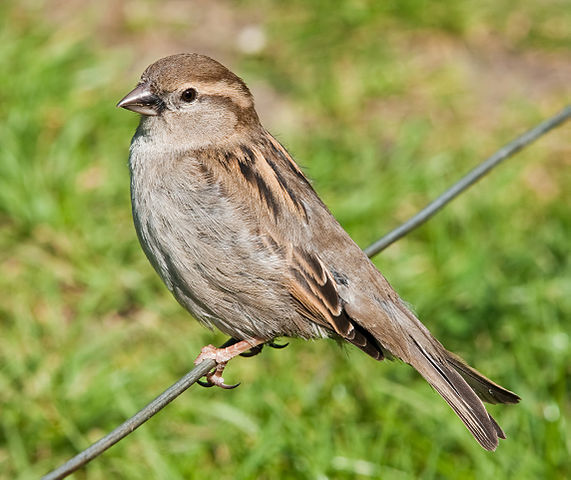

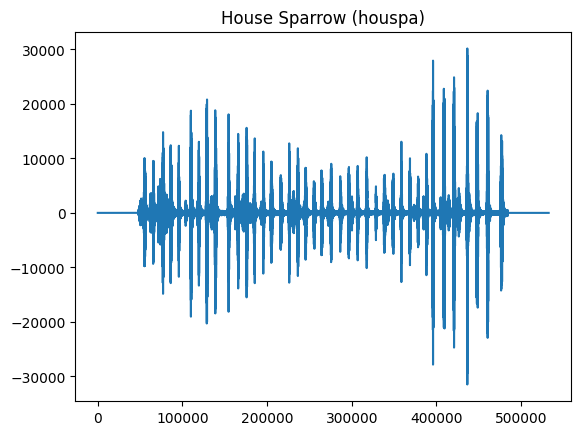

In [6]:
random_audio = get_random_audio_file()
show_bird_data(random_audio)

## Training the Model

When using Model Maker for audio, you have to start with a model spec. This is the base model that your new model will extract information to learn about the new classes. It also affects how the dataset will be transformed to respect the models spec parameters like: sample rate, number of channels.

[YAMNet](https://tfhub.dev/google/yamnet/1) is an audio event classifier trained on the AudioSet dataset to predict audio events from the AudioSet ontology.

It's input is expected to be at 16kHz and with 1 channel.

You don't need to do any resampling yourself. Model Maker takes care of that for you.

- `frame_length` is to decide how long each traininng sample is. in this caase EXPECTED_WAVEFORM_LENGTH * 3s

- `frame_steps` is to decide how far appart are the training samples. In this case, the ith sample will start at EXPECTED_WAVEFORM_LENGTH * 6s after the (i-1)th sample.

The reason to set these values is to work around some limitation in real world dataset.

For example, in the bird dataset, birds don't sing all the time. They sing, rest and sing again, with noises in between. Having a long frame would help capture the singing, but setting it too long will reduce the number of samples for training.


In [7]:
spec = audio_classifier.YamNetSpec(
    keep_yamnet_and_custom_heads=True,
    frame_step=3 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH,
    frame_length=6 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH)

INFO:tensorflow:Checkpoints are stored in /tmpfs/tmp/tmpdqml6_zs


## Loading the data

Model Maker has the API to load the data from a folder and have it in the expected format for the model spec.

The train and test split are based on the folders. The validation dataset will be created as 20% of the train split.

Note: The `cache=True` is important to make training later faster but it will also require more RAM to hold the data. For the birds dataset that is not a problem since it's only 300MB, but if you use your own data you have to pay attention to it.


In [8]:
train_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'train'), cache=True)
train_data, validation_data = train_data.split(0.8)
test_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'test'), cache=True)

## Training the model

the audio_classifier has the [`create`](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/audio_classifier/create) method that creates a model and already start training it. 

You can customize many parameterss, for more information you can read more details in the documentation.

On this first try you'll use all the default configurations and train for 100 epochs.

Note: The first epoch takes longer than all the other ones because it's when the cache is created. After that each epoch takes close to 1 second.

In [9]:
batch_size = 128
epochs = 100

print('Training the model')
model = audio_classifier.create(
    train_data,
    spec,
    validation_data,
    batch_size=batch_size,
    epochs=epochs)

Training the model


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 classification_head (Dense)  (None, 5)                5125      


Total params: 5,125


Trainable params: 5,125


Non-trainable params: 0


_________________________________________________________________


Epoch 1/100


      1/Unknown - 3s 3s/step - loss: 1.6778 - acc: 0.1953

      2/Unknown - 3s 454ms/step - loss: 1.6841 - acc: 0.1797

      3/Unknown - 4s 481ms/step - loss: 1.6688 - acc: 0.1953

      4/Unknown - 4s 486ms/step - loss: 1.6412 - acc: 0.2070

      5/Unknown - 5s 498ms/step - loss: 1.6118 - acc: 0.2219

      6/Unknown - 5s 501ms/step - loss: 1.5815 - acc: 0.2435

      7/Unknown - 6s 502ms/step - loss: 1.5629 - acc: 0.2600

      8/Unknown - 6s 503ms/step - loss: 1.5432 - acc: 0.2812

      9/Unknown - 7s 503ms/step - loss: 1.5330 - acc: 0.2847

     10/Unknown - 7s 504ms/step - loss: 1.5242 - acc: 0.2867

     11/Unknown - 8s 504ms/step - loss: 1.5349 - acc: 0.2777

     12/Unknown - 8s 504ms/step - loss: 1.5435 - acc: 0.2715

     13/Unknown - 9s 503ms/step - loss: 1.5456 - acc: 0.2686

     14/Unknown - 9s 504ms/step - loss: 1.5357 - acc: 0.2768

     15/Unknown - 10s 505ms/step - loss: 1.5290 - acc: 0.2859

     16/Unknown - 10s 505ms/step - loss: 1.5230 - acc: 0.2905

     17/Unknown - 11s 504ms/step - loss: 1.5157 - acc: 0.2969

     18/Unknown - 11s 504ms/step - loss: 1.5047 - acc: 0.3051

     19/Unknown - 12s 505ms/step - loss: 1.4978 - acc: 0.3137

     20/Unknown - 12s 510ms/step - loss: 1.4863 - acc: 0.3250

     21/Unknown - 13s 510ms/step - loss: 1.4751 - acc: 0.3363

     22/Unknown - 13s 509ms/step - loss: 1.4686 - acc: 0.3445

     23/Unknown - 14s 491ms/step - loss: 1.4603 - acc: 0.3522

24/24 [==============================] - 17s 606ms/step - loss: 1.4590 - acc: 0.3536 - val_loss: 1.3477 - val_acc: 0.4064


Epoch 2/100


 1/24 [>.............................] - ETA: 1s - loss: 1.2962 - acc: 0.4766

 8/24 [=========>....................] - ETA: 0s - loss: 1.2720 - acc: 0.5107

15/24 [=================>............] - ETA: 0s - loss: 1.2852 - acc: 0.4870

22/24 [==========================>...] - ETA: 0s - loss: 1.2334 - acc: 0.5352

24/24 [==============================] - 1s 23ms/step - loss: 1.2257 - acc: 0.5408 - val_loss: 1.1705 - val_acc: 0.6164


Epoch 3/100


 1/24 [>.............................] - ETA: 1s - loss: 1.1224 - acc: 0.6094

 9/24 [==========>...................] - ETA: 0s - loss: 1.0950 - acc: 0.6467

18/24 [=====================>........] - ETA: 0s - loss: 1.1207 - acc: 0.6055

24/24 [==============================] - 0s 17ms/step - loss: 1.0755 - acc: 0.6418 - val_loss: 1.0612 - val_acc: 0.6895


Epoch 4/100


 1/24 [>.............................] - ETA: 1s - loss: 1.1008 - acc: 0.6406

10/24 [===========>..................] - ETA: 0s - loss: 0.9926 - acc: 0.6977

19/24 [======================>.......] - ETA: 0s - loss: 1.0027 - acc: 0.6690

24/24 [==============================] - 0s 18ms/step - loss: 0.9710 - acc: 0.6938 - val_loss: 0.9898 - val_acc: 0.7146


Epoch 5/100


 1/24 [>.............................] - ETA: 1s - loss: 0.9920 - acc: 0.6328

 8/24 [=========>....................] - ETA: 0s - loss: 0.9142 - acc: 0.7246

16/24 [===================>..........] - ETA: 0s - loss: 0.9513 - acc: 0.6787

24/24 [==============================] - 0s 18ms/step - loss: 0.8907 - acc: 0.7178 - val_loss: 0.9328 - val_acc: 0.7374


Epoch 6/100


 1/24 [>.............................] - ETA: 1s - loss: 0.8972 - acc: 0.6875

10/24 [===========>..................] - ETA: 0s - loss: 0.8510 - acc: 0.7359

19/24 [======================>.......] - ETA: 0s - loss: 0.8713 - acc: 0.7130

24/24 [==============================] - 0s 17ms/step - loss: 0.8365 - acc: 0.7342 - val_loss: 0.8891 - val_acc: 0.7352


Epoch 7/100


 1/24 [>.............................] - ETA: 1s - loss: 0.8732 - acc: 0.7109

 8/24 [=========>....................] - ETA: 0s - loss: 0.8022 - acc: 0.7637

15/24 [=================>............] - ETA: 0s - loss: 0.8392 - acc: 0.7245

22/24 [==========================>...] - ETA: 0s - loss: 0.7873 - acc: 0.7575

24/24 [==============================] - 0s 19ms/step - loss: 0.7848 - acc: 0.7582 - val_loss: 0.8534 - val_acc: 0.7374


Epoch 8/100


 1/24 [>.............................] - ETA: 1s - loss: 0.7847 - acc: 0.7188

10/24 [===========>..................] - ETA: 0s - loss: 0.7467 - acc: 0.7703

19/24 [======================>.......] - ETA: 0s - loss: 0.7834 - acc: 0.7414

24/24 [==============================] - 0s 17ms/step - loss: 0.7488 - acc: 0.7635 - val_loss: 0.8233 - val_acc: 0.7443


Epoch 9/100


 1/24 [>.............................] - ETA: 1s - loss: 0.8031 - acc: 0.6953

 8/24 [=========>....................] - ETA: 0s - loss: 0.7280 - acc: 0.7881

15/24 [=================>............] - ETA: 0s - loss: 0.7737 - acc: 0.7443

24/24 [==============================] - 0s 18ms/step - loss: 0.7179 - acc: 0.7780 - val_loss: 0.7978 - val_acc: 0.7466


Epoch 10/100


 1/24 [>.............................] - ETA: 1s - loss: 0.7356 - acc: 0.7500

 9/24 [==========>...................] - ETA: 0s - loss: 0.6944 - acc: 0.7951

17/24 [====================>.........] - ETA: 0s - loss: 0.7321 - acc: 0.7587

24/24 [==============================] - 0s 18ms/step - loss: 0.6794 - acc: 0.7872 - val_loss: 0.7773 - val_acc: 0.7534


Epoch 11/100


 1/24 [>.............................] - ETA: 1s - loss: 0.7592 - acc: 0.6797

10/24 [===========>..................] - ETA: 0s - loss: 0.6694 - acc: 0.7953

18/24 [=====================>........] - ETA: 0s - loss: 0.7147 - acc: 0.7622

24/24 [==============================] - 0s 18ms/step - loss: 0.6671 - acc: 0.7888 - val_loss: 0.7548 - val_acc: 0.7603


Epoch 12/100


 1/24 [>.............................] - ETA: 1s - loss: 0.7144 - acc: 0.7344

 8/24 [=========>....................] - ETA: 0s - loss: 0.6530 - acc: 0.7988

15/24 [=================>............] - ETA: 0s - loss: 0.6937 - acc: 0.7698

24/24 [==============================] - ETA: 0s - loss: 0.6424 - acc: 0.7944

24/24 [==============================] - 1s 22ms/step - loss: 0.6424 - acc: 0.7944 - val_loss: 0.7377 - val_acc: 0.7626


Epoch 13/100


 1/24 [>.............................] - ETA: 1s - loss: 0.7616 - acc: 0.7109

 8/24 [=========>....................] - ETA: 0s - loss: 0.6285 - acc: 0.8125

15/24 [=================>............] - ETA: 0s - loss: 0.6720 - acc: 0.7818

22/24 [==========================>...] - ETA: 0s - loss: 0.6125 - acc: 0.8132

24/24 [==============================] - 0s 19ms/step - loss: 0.6171 - acc: 0.8099 - val_loss: 0.7221 - val_acc: 0.7626


Epoch 14/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6573 - acc: 0.7578

 8/24 [=========>....................] - ETA: 0s - loss: 0.6122 - acc: 0.8135

15/24 [=================>............] - ETA: 0s - loss: 0.6579 - acc: 0.7771

22/24 [==========================>...] - ETA: 0s - loss: 0.6017 - acc: 0.8079

24/24 [==============================] - 0s 19ms/step - loss: 0.6030 - acc: 0.8072 - val_loss: 0.7095 - val_acc: 0.7626


Epoch 15/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6175 - acc: 0.7891

10/24 [===========>..................] - ETA: 0s - loss: 0.6035 - acc: 0.8195

19/24 [======================>.......] - ETA: 0s - loss: 0.6240 - acc: 0.7985

24/24 [==============================] - 0s 17ms/step - loss: 0.5921 - acc: 0.8138 - val_loss: 0.6965 - val_acc: 0.7694


Epoch 16/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6073 - acc: 0.7578

10/24 [===========>..................] - ETA: 0s - loss: 0.5808 - acc: 0.8266

18/24 [=====================>........] - ETA: 0s - loss: 0.6228 - acc: 0.7977

24/24 [==============================] - 0s 17ms/step - loss: 0.5762 - acc: 0.8214 - val_loss: 0.6847 - val_acc: 0.7671


Epoch 17/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6534 - acc: 0.7578

 8/24 [=========>....................] - ETA: 0s - loss: 0.5638 - acc: 0.8232

16/24 [===================>..........] - ETA: 0s - loss: 0.6132 - acc: 0.7964

24/24 [==============================] - 0s 18ms/step - loss: 0.5582 - acc: 0.8227 - val_loss: 0.6730 - val_acc: 0.7694


Epoch 18/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6538 - acc: 0.7422

 9/24 [==========>...................] - ETA: 0s - loss: 0.5522 - acc: 0.8142

17/24 [====================>.........] - ETA: 0s - loss: 0.5955 - acc: 0.7927

24/24 [==============================] - 0s 18ms/step - loss: 0.5459 - acc: 0.8211 - val_loss: 0.6637 - val_acc: 0.7671


Epoch 19/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6465 - acc: 0.7578

 8/24 [=========>....................] - ETA: 0s - loss: 0.5497 - acc: 0.8320

15/24 [=================>............] - ETA: 0s - loss: 0.5837 - acc: 0.8130

22/24 [==========================>...] - ETA: 0s - loss: 0.5363 - acc: 0.8388

24/24 [==============================] - 0s 18ms/step - loss: 0.5336 - acc: 0.8411 - val_loss: 0.6524 - val_acc: 0.7694


Epoch 20/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6173 - acc: 0.7812

10/24 [===========>..................] - ETA: 0s - loss: 0.5307 - acc: 0.8383

19/24 [======================>.......] - ETA: 0s - loss: 0.5533 - acc: 0.8261

24/24 [==============================] - 0s 17ms/step - loss: 0.5250 - acc: 0.8368 - val_loss: 0.6428 - val_acc: 0.7831


Epoch 21/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5749 - acc: 0.8125

 8/24 [=========>....................] - ETA: 0s - loss: 0.5195 - acc: 0.8369

15/24 [=================>............] - ETA: 0s - loss: 0.5696 - acc: 0.8099

22/24 [==========================>...] - ETA: 0s - loss: 0.5233 - acc: 0.8281

24/24 [==============================] - 0s 18ms/step - loss: 0.5185 - acc: 0.8296 - val_loss: 0.6375 - val_acc: 0.7831


Epoch 22/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6148 - acc: 0.7656

10/24 [===========>..................] - ETA: 0s - loss: 0.5169 - acc: 0.8336

19/24 [======================>.......] - ETA: 0s - loss: 0.5380 - acc: 0.8228

24/24 [==============================] - 0s 17ms/step - loss: 0.5071 - acc: 0.8385 - val_loss: 0.6279 - val_acc: 0.7854


Epoch 23/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6199 - acc: 0.7578

 9/24 [==========>...................] - ETA: 0s - loss: 0.5057 - acc: 0.8490

18/24 [=====================>........] - ETA: 0s - loss: 0.5431 - acc: 0.8234

24/24 [==============================] - 0s 18ms/step - loss: 0.5013 - acc: 0.8424 - val_loss: 0.6232 - val_acc: 0.7831


Epoch 24/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6082 - acc: 0.7422

 9/24 [==========>...................] - ETA: 0s - loss: 0.4962 - acc: 0.8481

18/24 [=====================>........] - ETA: 0s - loss: 0.5292 - acc: 0.8364

24/24 [==============================] - 0s 18ms/step - loss: 0.4867 - acc: 0.8556 - val_loss: 0.6129 - val_acc: 0.7854


Epoch 25/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5732 - acc: 0.7500

 9/24 [==========>...................] - ETA: 0s - loss: 0.4756 - acc: 0.8507

16/24 [===================>..........] - ETA: 0s - loss: 0.5319 - acc: 0.8223

24/24 [==============================] - 0s 18ms/step - loss: 0.4801 - acc: 0.8461 - val_loss: 0.6090 - val_acc: 0.7854


Epoch 26/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6289 - acc: 0.7031

 8/24 [=========>....................] - ETA: 0s - loss: 0.4594 - acc: 0.8623

15/24 [=================>............] - ETA: 0s - loss: 0.5217 - acc: 0.8344

22/24 [==========================>...] - ETA: 0s - loss: 0.4749 - acc: 0.8533

24/24 [==============================] - 0s 18ms/step - loss: 0.4722 - acc: 0.8553 - val_loss: 0.6001 - val_acc: 0.7877


Epoch 27/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6121 - acc: 0.7344

10/24 [===========>..................] - ETA: 0s - loss: 0.4826 - acc: 0.8484

19/24 [======================>.......] - ETA: 0s - loss: 0.5000 - acc: 0.8388

24/24 [==============================] - 0s 17ms/step - loss: 0.4712 - acc: 0.8520 - val_loss: 0.5957 - val_acc: 0.7831


Epoch 28/100


 1/24 [>.............................] - ETA: 1s - loss: 0.6073 - acc: 0.7344

 9/24 [==========>...................] - ETA: 0s - loss: 0.4577 - acc: 0.8611

16/24 [===================>..........] - ETA: 0s - loss: 0.5160 - acc: 0.8369

24/24 [==============================] - ETA: 0s - loss: 0.4636 - acc: 0.8562

24/24 [==============================] - 0s 18ms/step - loss: 0.4636 - acc: 0.8562 - val_loss: 0.5883 - val_acc: 0.7945


Epoch 29/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5804 - acc: 0.7969

 9/24 [==========>...................] - ETA: 0s - loss: 0.4515 - acc: 0.8524

16/24 [===================>..........] - ETA: 0s - loss: 0.5058 - acc: 0.8267

24/24 [==============================] - 0s 19ms/step - loss: 0.4562 - acc: 0.8526 - val_loss: 0.5828 - val_acc: 0.8037


Epoch 30/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5828 - acc: 0.7891

10/24 [===========>..................] - ETA: 0s - loss: 0.4528 - acc: 0.8617

19/24 [======================>.......] - ETA: 0s - loss: 0.4733 - acc: 0.8520

24/24 [==============================] - 0s 17ms/step - loss: 0.4476 - acc: 0.8618 - val_loss: 0.5789 - val_acc: 0.7968


Epoch 31/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5196 - acc: 0.7969

 8/24 [=========>....................] - ETA: 0s - loss: 0.4494 - acc: 0.8574

15/24 [=================>............] - ETA: 0s - loss: 0.4941 - acc: 0.8365

22/24 [==========================>...] - ETA: 0s - loss: 0.4465 - acc: 0.8587

24/24 [==============================] - 0s 19ms/step - loss: 0.4454 - acc: 0.8592 - val_loss: 0.5738 - val_acc: 0.8037


Epoch 32/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5583 - acc: 0.7344

 9/24 [==========>...................] - ETA: 0s - loss: 0.4359 - acc: 0.8559

18/24 [=====================>........] - ETA: 0s - loss: 0.4817 - acc: 0.8390

24/24 [==============================] - 0s 17ms/step - loss: 0.4405 - acc: 0.8589 - val_loss: 0.5693 - val_acc: 0.8059


Epoch 33/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5547 - acc: 0.8047

 9/24 [==========>...................] - ETA: 0s - loss: 0.4408 - acc: 0.8524

18/24 [=====================>........] - ETA: 0s - loss: 0.4745 - acc: 0.8381

24/24 [==============================] - 0s 17ms/step - loss: 0.4353 - acc: 0.8589 - val_loss: 0.5627 - val_acc: 0.8082


Epoch 34/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5791 - acc: 0.7656

 8/24 [=========>....................] - ETA: 0s - loss: 0.4486 - acc: 0.8535

15/24 [=================>............] - ETA: 0s - loss: 0.4811 - acc: 0.8365

22/24 [==========================>...] - ETA: 0s - loss: 0.4331 - acc: 0.8572

24/24 [==============================] - 0s 19ms/step - loss: 0.4366 - acc: 0.8576 - val_loss: 0.5628 - val_acc: 0.8037


Epoch 35/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4603 - acc: 0.8359

10/24 [===========>..................] - ETA: 0s - loss: 0.4406 - acc: 0.8594

19/24 [======================>.......] - ETA: 0s - loss: 0.4555 - acc: 0.8524

24/24 [==============================] - 0s 17ms/step - loss: 0.4284 - acc: 0.8645 - val_loss: 0.5585 - val_acc: 0.8059


Epoch 36/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5867 - acc: 0.7734

 8/24 [=========>....................] - ETA: 0s - loss: 0.4261 - acc: 0.8594

16/24 [===================>..........] - ETA: 0s - loss: 0.4793 - acc: 0.8413

24/24 [==============================] - 0s 18ms/step - loss: 0.4250 - acc: 0.8632 - val_loss: 0.5535 - val_acc: 0.8128


Epoch 37/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5165 - acc: 0.8125

 9/24 [==========>...................] - ETA: 0s - loss: 0.4257 - acc: 0.8620

17/24 [====================>.........] - ETA: 0s - loss: 0.4638 - acc: 0.8511

24/24 [==============================] - 0s 18ms/step - loss: 0.4216 - acc: 0.8684 - val_loss: 0.5503 - val_acc: 0.8059


Epoch 38/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5645 - acc: 0.7578

 9/24 [==========>...................] - ETA: 0s - loss: 0.4095 - acc: 0.8585

18/24 [=====================>........] - ETA: 0s - loss: 0.4535 - acc: 0.8455

24/24 [==============================] - 0s 17ms/step - loss: 0.4163 - acc: 0.8645 - val_loss: 0.5456 - val_acc: 0.8082


Epoch 39/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5185 - acc: 0.8281

10/24 [===========>..................] - ETA: 0s - loss: 0.4297 - acc: 0.8664

19/24 [======================>.......] - ETA: 0s - loss: 0.4380 - acc: 0.8565

24/24 [==============================] - 0s 17ms/step - loss: 0.4121 - acc: 0.8687 - val_loss: 0.5420 - val_acc: 0.8151


Epoch 40/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5493 - acc: 0.7812

10/24 [===========>..................] - ETA: 0s - loss: 0.4047 - acc: 0.8664

19/24 [======================>.......] - ETA: 0s - loss: 0.4371 - acc: 0.8520

24/24 [==============================] - 0s 17ms/step - loss: 0.4122 - acc: 0.8648 - val_loss: 0.5403 - val_acc: 0.8082


Epoch 41/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5250 - acc: 0.7969

 9/24 [==========>...................] - ETA: 0s - loss: 0.3888 - acc: 0.8793

17/24 [====================>.........] - ETA: 0s - loss: 0.4464 - acc: 0.8529

24/24 [==============================] - 0s 18ms/step - loss: 0.4047 - acc: 0.8704 - val_loss: 0.5368 - val_acc: 0.8082


Epoch 42/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5411 - acc: 0.7969

 9/24 [==========>...................] - ETA: 0s - loss: 0.4024 - acc: 0.8698

17/24 [====================>.........] - ETA: 0s - loss: 0.4432 - acc: 0.8470

24/24 [==============================] - 0s 18ms/step - loss: 0.4002 - acc: 0.8674 - val_loss: 0.5322 - val_acc: 0.8128


Epoch 43/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5990 - acc: 0.7422

10/24 [===========>..................] - ETA: 0s - loss: 0.4054 - acc: 0.8727

19/24 [======================>.......] - ETA: 0s - loss: 0.4227 - acc: 0.8680

24/24 [==============================] - 0s 17ms/step - loss: 0.3990 - acc: 0.8760 - val_loss: 0.5302 - val_acc: 0.8105


Epoch 44/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5174 - acc: 0.7734

10/24 [===========>..................] - ETA: 0s - loss: 0.3919 - acc: 0.8727

19/24 [======================>.......] - ETA: 0s - loss: 0.4121 - acc: 0.8680

24/24 [==============================] - 0s 17ms/step - loss: 0.3899 - acc: 0.8766 - val_loss: 0.5282 - val_acc: 0.8128


Epoch 45/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5418 - acc: 0.7422

 9/24 [==========>...................] - ETA: 0s - loss: 0.4071 - acc: 0.8637

17/24 [====================>.........] - ETA: 0s - loss: 0.4297 - acc: 0.8562

24/24 [==============================] - 0s 18ms/step - loss: 0.3892 - acc: 0.8740 - val_loss: 0.5291 - val_acc: 0.8105


Epoch 46/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5014 - acc: 0.8125

 9/24 [==========>...................] - ETA: 0s - loss: 0.4032 - acc: 0.8646

18/24 [=====================>........] - ETA: 0s - loss: 0.4301 - acc: 0.8572

24/24 [==============================] - 0s 18ms/step - loss: 0.3961 - acc: 0.8724 - val_loss: 0.5213 - val_acc: 0.8105


Epoch 47/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5622 - acc: 0.7969

 8/24 [=========>....................] - ETA: 0s - loss: 0.3820 - acc: 0.8809

15/24 [=================>............] - ETA: 0s - loss: 0.4212 - acc: 0.8641

24/24 [==============================] - ETA: 0s - loss: 0.3801 - acc: 0.8783

24/24 [==============================] - 0s 19ms/step - loss: 0.3801 - acc: 0.8783 - val_loss: 0.5192 - val_acc: 0.8105


Epoch 48/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5005 - acc: 0.8047

10/24 [===========>..................] - ETA: 0s - loss: 0.3946 - acc: 0.8664

19/24 [======================>.......] - ETA: 0s - loss: 0.4145 - acc: 0.8614

24/24 [==============================] - 0s 17ms/step - loss: 0.3889 - acc: 0.8750 - val_loss: 0.5163 - val_acc: 0.8128


Epoch 49/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5117 - acc: 0.7891

 9/24 [==========>...................] - ETA: 0s - loss: 0.3790 - acc: 0.8741

17/24 [====================>.........] - ETA: 0s - loss: 0.4190 - acc: 0.8598

24/24 [==============================] - 0s 18ms/step - loss: 0.3799 - acc: 0.8786 - val_loss: 0.5151 - val_acc: 0.8128


Epoch 50/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5543 - acc: 0.7578

 8/24 [=========>....................] - ETA: 0s - loss: 0.3913 - acc: 0.8672

15/24 [=================>............] - ETA: 0s - loss: 0.4218 - acc: 0.8552

24/24 [==============================] - 0s 18ms/step - loss: 0.3767 - acc: 0.8724 - val_loss: 0.5109 - val_acc: 0.8151


Epoch 51/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4719 - acc: 0.7969

 8/24 [=========>....................] - ETA: 0s - loss: 0.3684 - acc: 0.8789

15/24 [=================>............] - ETA: 0s - loss: 0.4167 - acc: 0.8609

24/24 [==============================] - 0s 18ms/step - loss: 0.3752 - acc: 0.8766 - val_loss: 0.5093 - val_acc: 0.8151


Epoch 52/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5257 - acc: 0.7578

 9/24 [==========>...................] - ETA: 0s - loss: 0.3873 - acc: 0.8750

17/24 [====================>.........] - ETA: 0s - loss: 0.4150 - acc: 0.8626

24/24 [==============================] - 0s 18ms/step - loss: 0.3731 - acc: 0.8839 - val_loss: 0.5073 - val_acc: 0.8151


Epoch 53/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4467 - acc: 0.7891

 9/24 [==========>...................] - ETA: 0s - loss: 0.3709 - acc: 0.8724

17/24 [====================>.........] - ETA: 0s - loss: 0.4121 - acc: 0.8585

24/24 [==============================] - 0s 18ms/step - loss: 0.3715 - acc: 0.8766 - val_loss: 0.5057 - val_acc: 0.8151


Epoch 54/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4556 - acc: 0.7969

10/24 [===========>..................] - ETA: 0s - loss: 0.3736 - acc: 0.8773

18/24 [=====================>........] - ETA: 0s - loss: 0.3960 - acc: 0.8668

24/24 [==============================] - 0s 18ms/step - loss: 0.3627 - acc: 0.8829 - val_loss: 0.5040 - val_acc: 0.8151


Epoch 55/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4685 - acc: 0.7891

 8/24 [=========>....................] - ETA: 0s - loss: 0.3722 - acc: 0.8730

15/24 [=================>............] - ETA: 0s - loss: 0.4083 - acc: 0.8599

24/24 [==============================] - 0s 18ms/step - loss: 0.3716 - acc: 0.8763 - val_loss: 0.5002 - val_acc: 0.8151


Epoch 56/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4654 - acc: 0.8047

10/24 [===========>..................] - ETA: 0s - loss: 0.3605 - acc: 0.8844

19/24 [======================>.......] - ETA: 0s - loss: 0.3836 - acc: 0.8697

24/24 [==============================] - 0s 17ms/step - loss: 0.3644 - acc: 0.8766 - val_loss: 0.4991 - val_acc: 0.8151


Epoch 57/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5168 - acc: 0.7734

 9/24 [==========>...................] - ETA: 0s - loss: 0.3650 - acc: 0.8802

17/24 [====================>.........] - ETA: 0s - loss: 0.4069 - acc: 0.8621

24/24 [==============================] - 0s 18ms/step - loss: 0.3655 - acc: 0.8809 - val_loss: 0.4956 - val_acc: 0.8196


Epoch 58/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4719 - acc: 0.8359

10/24 [===========>..................] - ETA: 0s - loss: 0.3740 - acc: 0.8789

19/24 [======================>.......] - ETA: 0s - loss: 0.3882 - acc: 0.8684

24/24 [==============================] - 0s 18ms/step - loss: 0.3628 - acc: 0.8796 - val_loss: 0.4946 - val_acc: 0.8219


Epoch 59/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4885 - acc: 0.8203

 9/24 [==========>...................] - ETA: 0s - loss: 0.3755 - acc: 0.8741

17/24 [====================>.........] - ETA: 0s - loss: 0.4071 - acc: 0.8585

24/24 [==============================] - 0s 18ms/step - loss: 0.3675 - acc: 0.8789 - val_loss: 0.4903 - val_acc: 0.8265


Epoch 60/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4301 - acc: 0.8125

 9/24 [==========>...................] - ETA: 0s - loss: 0.3560 - acc: 0.8785

17/24 [====================>.........] - ETA: 0s - loss: 0.3962 - acc: 0.8663

24/24 [==============================] - 0s 18ms/step - loss: 0.3564 - acc: 0.8832 - val_loss: 0.4888 - val_acc: 0.8196


Epoch 61/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4439 - acc: 0.8359

10/24 [===========>..................] - ETA: 0s - loss: 0.3634 - acc: 0.8734

19/24 [======================>.......] - ETA: 0s - loss: 0.3807 - acc: 0.8701

24/24 [==============================] - 0s 18ms/step - loss: 0.3588 - acc: 0.8799 - val_loss: 0.4876 - val_acc: 0.8265


Epoch 62/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4406 - acc: 0.7969

 8/24 [=========>....................] - ETA: 0s - loss: 0.3525 - acc: 0.8740

15/24 [=================>............] - ETA: 0s - loss: 0.4019 - acc: 0.8562

22/24 [==========================>...] - ETA: 0s - loss: 0.3531 - acc: 0.8796

24/24 [==============================] - 0s 19ms/step - loss: 0.3536 - acc: 0.8799 - val_loss: 0.4870 - val_acc: 0.8265


Epoch 63/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5370 - acc: 0.7656

10/24 [===========>..................] - ETA: 0s - loss: 0.3616 - acc: 0.8781

18/24 [=====================>........] - ETA: 0s - loss: 0.3777 - acc: 0.8759

24/24 [==============================] - 0s 18ms/step - loss: 0.3471 - acc: 0.8875 - val_loss: 0.4843 - val_acc: 0.8288


Epoch 64/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4256 - acc: 0.8125

10/24 [===========>..................] - ETA: 0s - loss: 0.3556 - acc: 0.8883

18/24 [=====================>........] - ETA: 0s - loss: 0.3786 - acc: 0.8772

24/24 [==============================] - 0s 18ms/step - loss: 0.3497 - acc: 0.8859 - val_loss: 0.4837 - val_acc: 0.8288


Epoch 65/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4944 - acc: 0.7812

 8/24 [=========>....................] - ETA: 0s - loss: 0.3463 - acc: 0.8799

15/24 [=================>............] - ETA: 0s - loss: 0.3860 - acc: 0.8615

24/24 [==============================] - 0s 18ms/step - loss: 0.3441 - acc: 0.8803 - val_loss: 0.4826 - val_acc: 0.8265


Epoch 66/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4297 - acc: 0.8203

 8/24 [=========>....................] - ETA: 0s - loss: 0.3510 - acc: 0.8799

15/24 [=================>............] - ETA: 0s - loss: 0.3936 - acc: 0.8687

22/24 [==========================>...] - ETA: 0s - loss: 0.3464 - acc: 0.8874

24/24 [==============================] - 0s 19ms/step - loss: 0.3479 - acc: 0.8872 - val_loss: 0.4800 - val_acc: 0.8288


Epoch 67/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3858 - acc: 0.8594

10/24 [===========>..................] - ETA: 0s - loss: 0.3529 - acc: 0.8797

19/24 [======================>.......] - ETA: 0s - loss: 0.3696 - acc: 0.8738

24/24 [==============================] - 0s 17ms/step - loss: 0.3482 - acc: 0.8839 - val_loss: 0.4802 - val_acc: 0.8242


Epoch 68/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3922 - acc: 0.8438

 8/24 [=========>....................] - ETA: 0s - loss: 0.3382 - acc: 0.8818

15/24 [=================>............] - ETA: 0s - loss: 0.3877 - acc: 0.8661

22/24 [==========================>...] - ETA: 0s - loss: 0.3417 - acc: 0.8857

24/24 [==============================] - 0s 19ms/step - loss: 0.3486 - acc: 0.8832 - val_loss: 0.4793 - val_acc: 0.8288


Epoch 69/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4889 - acc: 0.7344

10/24 [===========>..................] - ETA: 0s - loss: 0.3535 - acc: 0.8766

19/24 [======================>.......] - ETA: 0s - loss: 0.3636 - acc: 0.8762

24/24 [==============================] - 0s 17ms/step - loss: 0.3428 - acc: 0.8852 - val_loss: 0.4777 - val_acc: 0.8311


Epoch 70/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4119 - acc: 0.8438

 8/24 [=========>....................] - ETA: 0s - loss: 0.3515 - acc: 0.8818

15/24 [=================>............] - ETA: 0s - loss: 0.3928 - acc: 0.8672

22/24 [==========================>...] - ETA: 0s - loss: 0.3475 - acc: 0.8871

24/24 [==============================] - 0s 19ms/step - loss: 0.3450 - acc: 0.8895 - val_loss: 0.4772 - val_acc: 0.8311


Epoch 71/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5031 - acc: 0.8047

 9/24 [==========>...................] - ETA: 0s - loss: 0.3536 - acc: 0.8845

17/24 [====================>.........] - ETA: 0s - loss: 0.3847 - acc: 0.8681

24/24 [==============================] - 0s 18ms/step - loss: 0.3433 - acc: 0.8862 - val_loss: 0.4773 - val_acc: 0.8288


Epoch 72/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3997 - acc: 0.8594

 9/24 [==========>...................] - ETA: 0s - loss: 0.3244 - acc: 0.8958

17/24 [====================>.........] - ETA: 0s - loss: 0.3693 - acc: 0.8796

24/24 [==============================] - 0s 18ms/step - loss: 0.3301 - acc: 0.8954 - val_loss: 0.4737 - val_acc: 0.8311


Epoch 73/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5335 - acc: 0.7812

10/24 [===========>..................] - ETA: 0s - loss: 0.3590 - acc: 0.8734

17/24 [====================>.........] - ETA: 0s - loss: 0.3761 - acc: 0.8695

24/24 [==============================] - 0s 18ms/step - loss: 0.3333 - acc: 0.8918 - val_loss: 0.4738 - val_acc: 0.8311


Epoch 74/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3665 - acc: 0.8828

 9/24 [==========>...................] - ETA: 0s - loss: 0.3390 - acc: 0.8898

17/24 [====================>.........] - ETA: 0s - loss: 0.3755 - acc: 0.8699

24/24 [==============================] - 0s 19ms/step - loss: 0.3376 - acc: 0.8849 - val_loss: 0.4721 - val_acc: 0.8333


Epoch 75/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4406 - acc: 0.8359

10/24 [===========>..................] - ETA: 0s - loss: 0.3446 - acc: 0.8914

18/24 [=====================>........] - ETA: 0s - loss: 0.3697 - acc: 0.8772

24/24 [==============================] - 0s 18ms/step - loss: 0.3391 - acc: 0.8878 - val_loss: 0.4737 - val_acc: 0.8311


Epoch 76/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4475 - acc: 0.8047

10/24 [===========>..................] - ETA: 0s - loss: 0.3489 - acc: 0.8805

18/24 [=====================>........] - ETA: 0s - loss: 0.3665 - acc: 0.8763

24/24 [==============================] - 0s 18ms/step - loss: 0.3372 - acc: 0.8891 - val_loss: 0.4727 - val_acc: 0.8333


Epoch 77/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4299 - acc: 0.8125

 9/24 [==========>...................] - ETA: 0s - loss: 0.3333 - acc: 0.8802

17/24 [====================>.........] - ETA: 0s - loss: 0.3698 - acc: 0.8736

24/24 [==============================] - 0s 18ms/step - loss: 0.3301 - acc: 0.8888 - val_loss: 0.4714 - val_acc: 0.8288


Epoch 78/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4723 - acc: 0.7812

 9/24 [==========>...................] - ETA: 0s - loss: 0.3413 - acc: 0.8828

16/24 [===================>..........] - ETA: 0s - loss: 0.3787 - acc: 0.8687

24/24 [==============================] - 0s 18ms/step - loss: 0.3372 - acc: 0.8875 - val_loss: 0.4670 - val_acc: 0.8333


Epoch 79/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4392 - acc: 0.8281

 8/24 [=========>....................] - ETA: 0s - loss: 0.3146 - acc: 0.9053

16/24 [===================>..........] - ETA: 0s - loss: 0.3710 - acc: 0.8809

24/24 [==============================] - 0s 18ms/step - loss: 0.3327 - acc: 0.8921 - val_loss: 0.4665 - val_acc: 0.8311


Epoch 80/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4666 - acc: 0.8047

 8/24 [=========>....................] - ETA: 0s - loss: 0.3346 - acc: 0.8848

15/24 [=================>............] - ETA: 0s - loss: 0.3761 - acc: 0.8719

24/24 [==============================] - 0s 19ms/step - loss: 0.3340 - acc: 0.8898 - val_loss: 0.4660 - val_acc: 0.8356


Epoch 81/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4204 - acc: 0.8203

 8/24 [=========>....................] - ETA: 0s - loss: 0.3382 - acc: 0.8799

16/24 [===================>..........] - ETA: 0s - loss: 0.3704 - acc: 0.8765

24/24 [==============================] - 0s 18ms/step - loss: 0.3343 - acc: 0.8885 - val_loss: 0.4656 - val_acc: 0.8311


Epoch 82/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3988 - acc: 0.8359

 9/24 [==========>...................] - ETA: 0s - loss: 0.3440 - acc: 0.8819

17/24 [====================>.........] - ETA: 0s - loss: 0.3694 - acc: 0.8722

24/24 [==============================] - 0s 18ms/step - loss: 0.3295 - acc: 0.8891 - val_loss: 0.4648 - val_acc: 0.8288


Epoch 83/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4588 - acc: 0.8125

 8/24 [=========>....................] - ETA: 0s - loss: 0.3388 - acc: 0.8848

15/24 [=================>............] - ETA: 0s - loss: 0.3660 - acc: 0.8760

22/24 [==========================>...] - ETA: 0s - loss: 0.3193 - acc: 0.8949

24/24 [==============================] - 0s 19ms/step - loss: 0.3235 - acc: 0.8944 - val_loss: 0.4614 - val_acc: 0.8333


Epoch 84/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3942 - acc: 0.8359

 9/24 [==========>...................] - ETA: 0s - loss: 0.3342 - acc: 0.8889

17/24 [====================>.........] - ETA: 0s - loss: 0.3595 - acc: 0.8805

24/24 [==============================] - 0s 18ms/step - loss: 0.3238 - acc: 0.8938 - val_loss: 0.4636 - val_acc: 0.8311


Epoch 85/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4078 - acc: 0.8516

10/24 [===========>..................] - ETA: 0s - loss: 0.3242 - acc: 0.8945

19/24 [======================>.......] - ETA: 0s - loss: 0.3491 - acc: 0.8803

24/24 [==============================] - 0s 17ms/step - loss: 0.3285 - acc: 0.8908 - val_loss: 0.4601 - val_acc: 0.8333


Epoch 86/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3960 - acc: 0.8438

 9/24 [==========>...................] - ETA: 0s - loss: 0.3161 - acc: 0.8906

17/24 [====================>.........] - ETA: 0s - loss: 0.3567 - acc: 0.8750

24/24 [==============================] - 0s 18ms/step - loss: 0.3187 - acc: 0.8911 - val_loss: 0.4602 - val_acc: 0.8311


Epoch 87/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3428 - acc: 0.8906

 8/24 [=========>....................] - ETA: 0s - loss: 0.3094 - acc: 0.9004

16/24 [===================>..........] - ETA: 0s - loss: 0.3530 - acc: 0.8848

24/24 [==============================] - 0s 18ms/step - loss: 0.3180 - acc: 0.8964 - val_loss: 0.4545 - val_acc: 0.8356


Epoch 88/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4587 - acc: 0.8281

 8/24 [=========>....................] - ETA: 0s - loss: 0.3276 - acc: 0.8799

15/24 [=================>............] - ETA: 0s - loss: 0.3739 - acc: 0.8646

22/24 [==========================>...] - ETA: 0s - loss: 0.3311 - acc: 0.8839

24/24 [==============================] - 0s 19ms/step - loss: 0.3290 - acc: 0.8852 - val_loss: 0.4577 - val_acc: 0.8356


Epoch 89/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3450 - acc: 0.8828

 7/24 [=======>......................] - ETA: 0s - loss: 0.3066 - acc: 0.9051

14/24 [================>.............] - ETA: 0s - loss: 0.3473 - acc: 0.8834

21/24 [=========================>....] - ETA: 0s - loss: 0.3142 - acc: 0.8943

24/24 [==============================] - 0s 19ms/step - loss: 0.3121 - acc: 0.8967 - val_loss: 0.4578 - val_acc: 0.8333


Epoch 90/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4659 - acc: 0.7812

 8/24 [=========>....................] - ETA: 0s - loss: 0.3438 - acc: 0.8799

15/24 [=================>............] - ETA: 0s - loss: 0.3686 - acc: 0.8719

23/24 [===========================>..] - ETA: 0s - loss: 0.3238 - acc: 0.8899

24/24 [==============================] - 0s 19ms/step - loss: 0.3221 - acc: 0.8901 - val_loss: 0.4550 - val_acc: 0.8379


Epoch 91/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4023 - acc: 0.8672

10/24 [===========>..................] - ETA: 0s - loss: 0.3261 - acc: 0.8930

18/24 [=====================>........] - ETA: 0s - loss: 0.3456 - acc: 0.8898

24/24 [==============================] - 0s 18ms/step - loss: 0.3156 - acc: 0.9003 - val_loss: 0.4550 - val_acc: 0.8333


Epoch 92/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4032 - acc: 0.8438

 8/24 [=========>....................] - ETA: 0s - loss: 0.3241 - acc: 0.8936

16/24 [===================>..........] - ETA: 0s - loss: 0.3556 - acc: 0.8804

24/24 [==============================] - 0s 19ms/step - loss: 0.3186 - acc: 0.8961 - val_loss: 0.4540 - val_acc: 0.8379


Epoch 93/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4260 - acc: 0.8516

10/24 [===========>..................] - ETA: 0s - loss: 0.3395 - acc: 0.8859

19/24 [======================>.......] - ETA: 0s - loss: 0.3423 - acc: 0.8853

24/24 [==============================] - 0s 17ms/step - loss: 0.3258 - acc: 0.8941 - val_loss: 0.4506 - val_acc: 0.8402


Epoch 94/100


 1/24 [>.............................] - ETA: 1s - loss: 0.5140 - acc: 0.8047

10/24 [===========>..................] - ETA: 0s - loss: 0.3191 - acc: 0.8906

19/24 [======================>.......] - ETA: 0s - loss: 0.3285 - acc: 0.8869

24/24 [==============================] - 0s 18ms/step - loss: 0.3075 - acc: 0.8970 - val_loss: 0.4513 - val_acc: 0.8356


Epoch 95/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3954 - acc: 0.8438

 8/24 [=========>....................] - ETA: 0s - loss: 0.3241 - acc: 0.8916

16/24 [===================>..........] - ETA: 0s - loss: 0.3562 - acc: 0.8760

24/24 [==============================] - 0s 18ms/step - loss: 0.3169 - acc: 0.8947 - val_loss: 0.4512 - val_acc: 0.8356


Epoch 96/100


 1/24 [>.............................] - ETA: 1s - loss: 0.3989 - acc: 0.8594

 9/24 [==========>...................] - ETA: 0s - loss: 0.3105 - acc: 0.8993

17/24 [====================>.........] - ETA: 0s - loss: 0.3444 - acc: 0.8828

24/24 [==============================] - 0s 18ms/step - loss: 0.3063 - acc: 0.8987 - val_loss: 0.4477 - val_acc: 0.8425


Epoch 97/100


 1/24 [>.............................] - ETA: 0s - loss: 0.3490 - acc: 0.8672

 8/24 [=========>....................] - ETA: 0s - loss: 0.3044 - acc: 0.9014

15/24 [=================>............] - ETA: 0s - loss: 0.3498 - acc: 0.8750

22/24 [==========================>...] - ETA: 0s - loss: 0.3117 - acc: 0.8910

24/24 [==============================] - 0s 19ms/step - loss: 0.3114 - acc: 0.8924 - val_loss: 0.4466 - val_acc: 0.8402


Epoch 98/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4085 - acc: 0.8359

10/24 [===========>..................] - ETA: 0s - loss: 0.3330 - acc: 0.8883

19/24 [======================>.......] - ETA: 0s - loss: 0.3234 - acc: 0.8931

24/24 [==============================] - 0s 17ms/step - loss: 0.3031 - acc: 0.9003 - val_loss: 0.4484 - val_acc: 0.8402


Epoch 99/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4178 - acc: 0.8438

10/24 [===========>..................] - ETA: 0s - loss: 0.3232 - acc: 0.8891

19/24 [======================>.......] - ETA: 0s - loss: 0.3300 - acc: 0.8873

24/24 [==============================] - 0s 18ms/step - loss: 0.3099 - acc: 0.8984 - val_loss: 0.4479 - val_acc: 0.8356


Epoch 100/100


 1/24 [>.............................] - ETA: 1s - loss: 0.4397 - acc: 0.8203

 9/24 [==========>...................] - ETA: 0s - loss: 0.3176 - acc: 0.8898

16/24 [===================>..........] - ETA: 0s - loss: 0.3457 - acc: 0.8784

24/24 [==============================] - 0s 19ms/step - loss: 0.3100 - acc: 0.8941 - val_loss: 0.4479 - val_acc: 0.8379


The accuracy looks good but it's important to run the evaluation step on the test data and vefify your model achieved good results on unseed data.

In [10]:
print('Evaluating the model')
model.evaluate(test_data)

Evaluating the model


      1/Unknown - 1s 1s/step - loss: 1.3293 - acc: 0.5625

      2/Unknown - 1s 119ms/step - loss: 1.1923 - acc: 0.5156

      3/Unknown - 1s 127ms/step - loss: 0.8964 - acc: 0.6562

      4/Unknown - 1s 125ms/step - loss: 0.7917 - acc: 0.6484

      5/Unknown - 1s 123ms/step - loss: 0.7019 - acc: 0.7063

      6/Unknown - 2s 124ms/step - loss: 0.6656 - acc: 0.7344

      7/Unknown - 2s 125ms/step - loss: 0.5907 - acc: 0.7723

      8/Unknown - 2s 126ms/step - loss: 0.6209 - acc: 0.7695

      9/Unknown - 2s 124ms/step - loss: 0.6270 - acc: 0.7778

     10/Unknown - 2s 124ms/step - loss: 0.6160 - acc: 0.7937

     11/Unknown - 2s 126ms/step - loss: 0.7343 - acc: 0.7784

     12/Unknown - 2s 124ms/step - loss: 0.7263 - acc: 0.7734

     13/Unknown - 2s 124ms/step - loss: 0.6881 - acc: 0.7909

     14/Unknown - 3s 124ms/step - loss: 0.6838 - acc: 0.7946

     15/Unknown - 3s 125ms/step - loss: 0.7184 - acc: 0.7896

     16/Unknown - 3s 124ms/step - loss: 0.6938 - acc: 0.7930

     17/Unknown - 3s 124ms/step - loss: 0.6916 - acc: 0.7868

     18/Unknown - 3s 125ms/step - loss: 0.7245 - acc: 0.7726

     19/Unknown - 3s 125ms/step - loss: 0.7855 - acc: 0.7533

     20/Unknown - 3s 125ms/step - loss: 0.7626 - acc: 0.7594

     21/Unknown - 4s 125ms/step - loss: 0.8142 - acc: 0.7515

     22/Unknown - 4s 126ms/step - loss: 0.8012 - acc: 0.7571

     23/Unknown - 4s 126ms/step - loss: 0.7819 - acc: 0.7636

     24/Unknown - 4s 126ms/step - loss: 0.7608 - acc: 0.7734

     25/Unknown - 4s 126ms/step - loss: 0.7425 - acc: 0.7800

     26/Unknown - 4s 126ms/step - loss: 0.7183 - acc: 0.7885

     27/Unknown - 4s 125ms/step - loss: 0.7240 - acc: 0.7928

28/28 [==============================] - 4s 122ms/step - loss: 0.8122 - acc: 0.7865


[0.8122328519821167, 0.7864523530006409]

## Understanding your model

When training a classifier, it's useful to see the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). The confusion matrix gives you detailed knowledge of how your classifier is performing on test data.

Model Maker already creates the confusion matrix for you.

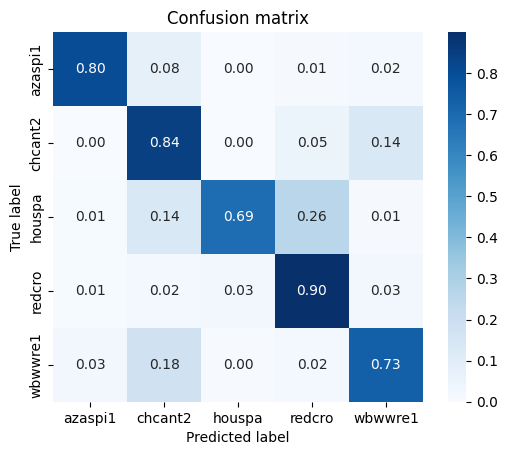

In [11]:
def show_confusion_matrix(confusion, test_labels):
  """Compute confusion matrix and normalize."""
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = test_labels
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

confusion_matrix = model.confusion_matrix(test_data)
show_confusion_matrix(confusion_matrix.numpy(), test_data.index_to_label)

## Testing the model [Optional]

You can try the model on a sample audio from the test dataset just to see the results.

First you get the serving model.

In [12]:
serving_model = model.create_serving_model()

print(f'Model\'s input shape and type: {serving_model.inputs}')
print(f'Model\'s output shape and type: {serving_model.outputs}')

Model's input shape and type: [<KerasTensor: shape=(None, 15600) dtype=float32 (created by layer 'audio')>]
Model's output shape and type: [<KerasTensor: shape=(None, 521) dtype=float32 (created by layer 'keras_layer')>, <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'sequential')>]


Coming back to the random audio you loaded earlier

Bird name: White-breasted Wood-Wren
Bird code: wbwwre1


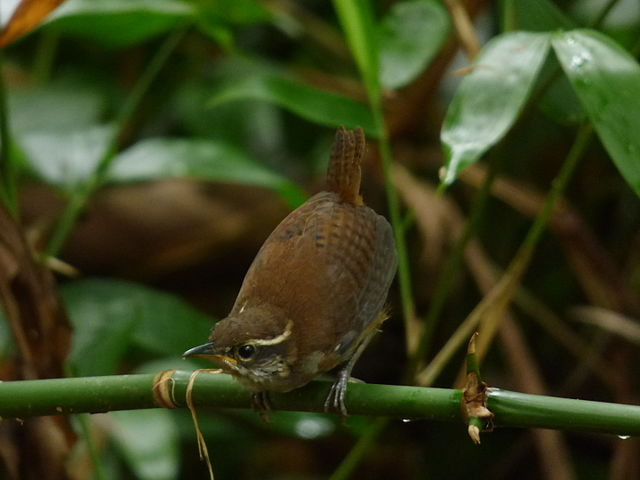

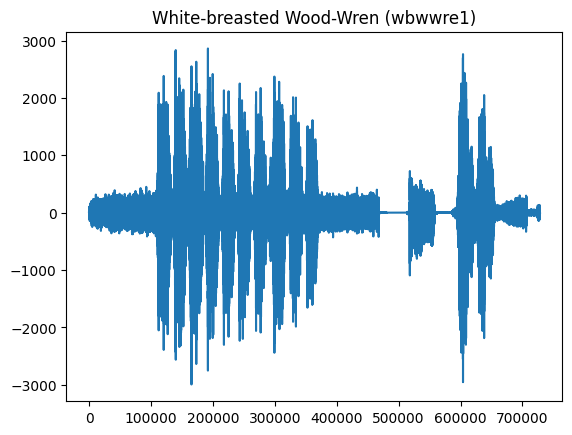

In [13]:
# if you want to try another file just uncoment the line below
random_audio = get_random_audio_file()
show_bird_data(random_audio)

The model created has a fixed input window. 

For a given audio file, you'll have to split it in windows of data of the expected size. The last window might need to be filled with zeros.

In [14]:
sample_rate, audio_data = wavfile.read(random_audio, 'rb')

audio_data = np.array(audio_data) / tf.int16.max
input_size = serving_model.input_shape[1]

splitted_audio_data = tf.signal.frame(audio_data, input_size, input_size, pad_end=True, pad_value=0)

print(f'Test audio path: {random_audio}')
print(f'Original size of the audio data: {len(audio_data)}')
print(f'Number of windows for inference: {len(splitted_audio_data)}')

Test audio path: /tmpfs/src/temp/tensorflow/lite/g3doc/models/modify/model_maker/dataset/small_birds_dataset/test/wbwwre1/XC519211.wav
Original size of the audio data: 728160
Number of windows for inference: 47


You'll loop over all the splitted audio and apply the model for each one of them.

The model you've just trained has 2 outputs: The original YAMNet's output and the one you've just trained. This is important because the real world environment is more complicated than just bird sounds. You can use the YAMNet's output to filter out non relevant audio, for example, on the birds use case, if YAMNet is not classifying Birds or Animals, this might show that the output from your model might have an irrelevant classification.


Below both outpus are printed to make it easier to understand their relation. Most of the mistakes that your model make are when YAMNet's prediction is not related to your domain (eg: birds).

In [15]:
print(random_audio)

results = []
print('Result of the window ith:  your model class -> score,  (spec class -> score)')
for i, data in enumerate(splitted_audio_data):
  yamnet_output, inference = serving_model(data)
  results.append(inference[0].numpy())
  result_index = tf.argmax(inference[0])
  spec_result_index = tf.argmax(yamnet_output[0])
  t = spec._yamnet_labels()[spec_result_index]
  result_str = f'Result of the window {i}: ' \
  f'\t{test_data.index_to_label[result_index]} -> {inference[0][result_index].numpy():.3f}, ' \
  f'\t({spec._yamnet_labels()[spec_result_index]} -> {yamnet_output[0][spec_result_index]:.3f})'
  print(result_str)


results_np = np.array(results)
mean_results = results_np.mean(axis=0)
result_index = mean_results.argmax()
print(f'Mean result: {test_data.index_to_label[result_index]} -> {mean_results[result_index]}')

/tmpfs/src/temp/tensorflow/lite/g3doc/models/modify/model_maker/dataset/small_birds_dataset/test/wbwwre1/XC519211.wav
Result of the window ith:  your model class -> score,  (spec class -> score)


Result of the window 0: 	wbwwre1 -> 0.947, 	(Aircraft -> 0.193)
Result of the window 1: 	wbwwre1 -> 0.969, 	(Outside, rural or natural -> 0.385)
Result of the window 2: 	wbwwre1 -> 0.982, 	(Outside, rural or natural -> 0.342)
Result of the window 3: 	wbwwre1 -> 0.994, 	(Cricket -> 0.630)
Result of the window 4: 	wbwwre1 -> 0.912, 	(Insect -> 0.671)
Result of the window 5: 	wbwwre1 -> 0.983, 	(Cricket -> 0.892)
Result of the window 6: 	wbwwre1 -> 0.975, 	(Cricket -> 0.872)
Result of the window 7: 	wbwwre1 -> 1.000, 	(Bird vocalization, bird call, bird song -> 0.661)
Result of the window 8: 	wbwwre1 -> 1.000, 	(Wild animals -> 0.351)
Result of the window 9: 	wbwwre1 -> 1.000, 	(Bird -> 0.445)
Result of the window 10: 	wbwwre1 -> 0.884, 	(Bird vocalization, bird call, bird song -> 0.758)
Result of the window 11: 	wbwwre1 -> 0.996, 	(Theremin -> 0.388)
Result of the window 12: 	wbwwre1 -> 1.000, 	(Bird -> 0.342)
Result of the window 13: 	wbwwre1 -> 0.999, 	(Bird vocalization, bird call, bi

Result of the window 22: 	wbwwre1 -> 0.932, 	(Animal -> 0.597)
Result of the window 23: 	wbwwre1 -> 0.969, 	(Bird vocalization, bird call, bird song -> 0.727)
Result of the window 24: 	wbwwre1 -> 0.920, 	(Cricket -> 0.629)
Result of the window 25: 	wbwwre1 -> 0.877, 	(Outside, rural or natural -> 0.189)
Result of the window 26: 	wbwwre1 -> 0.962, 	(Insect -> 0.318)
Result of the window 27: 	wbwwre1 -> 0.871, 	(Outside, rural or natural -> 0.431)
Result of the window 28: 	wbwwre1 -> 0.983, 	(Cricket -> 0.383)
Result of the window 29: 	wbwwre1 -> 0.984, 	(Cricket -> 0.602)
Result of the window 30: 	redcro -> 0.455, 	(Silence -> 1.000)
Result of the window 31: 	azaspi1 -> 0.373, 	(Silence -> 1.000)
Result of the window 32: 	chcant2 -> 0.835, 	(Silence -> 1.000)
Result of the window 33: 	chcant2 -> 0.911, 	(Speech -> 0.962)
Result of the window 34: 	chcant2 -> 0.588, 	(Speech -> 0.876)
Result of the window 35: 	chcant2 -> 0.319, 	(Speech -> 0.977)
Result of the window 36: 	azaspi1 -> 0.444

Result of the window 44: 	wbwwre1 -> 0.992, 	(Cricket -> 0.945)
Result of the window 45: 	chcant2 -> 0.571, 	(Speech -> 0.158)
Result of the window 46: 	chcant2 -> 0.787, 	(Silence -> 0.844)
Mean result: wbwwre1 -> 0.7325854897499084


## Exporting the model

The last step is exporting your model to be used on embedded devices or on the browser.

The `export` method export both formats for you.

In [16]:
models_path = './birds_models'
print(f'Exporing the TFLite model to {models_path}')

model.export(models_path, tflite_filename='my_birds_model.tflite')

Exporing the TFLite model to ./birds_models


2022-10-20 12:11:30.821235: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmpfs/tmp/tmphxc1u85r/assets


INFO:tensorflow:Assets written to: /tmpfs/tmp/tmphxc1u85r/assets


2022-10-20 12:11:36.989028: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-10-20 12:11:36.989080: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.


INFO:tensorflow:TensorFlow Lite model exported successfully: ./birds_models/my_birds_model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./birds_models/my_birds_model.tflite


You can also export the SavedModel version for serving or using on a Python environment.

In [17]:
model.export(models_path, export_format=[mm.ExportFormat.SAVED_MODEL, mm.ExportFormat.LABEL])

INFO:tensorflow:Assets written to: ./birds_models/saved_model/assets


INFO:tensorflow:Assets written to: ./birds_models/saved_model/assets


INFO:tensorflow:Saving labels in ./birds_models/labels.txt


INFO:tensorflow:Saving labels in ./birds_models/labels.txt


## Next Steps

You did it.

Now your new model can be deployed on  mobile devices using [TFLite AudioClassifier Task API](https://www.tensorflow.org/lite/inference_with_metadata/task_library/audio_classifier).

You can also try the same process with your own data with different classes and here is the documentation for [Model Maker for Audio Classification](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/audio_classifier).

Also learn from end-to-end reference apps: [Android](https://github.com/tensorflow/examples/tree/master/lite/examples/sound_classification/android/), [iOS](https://github.com/tensorflow/examples/tree/master/lite/examples/sound_classification/ios).